In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [71]:
from chromalab.observer import Observer, Cone


In [2]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment
from chromalab.spectra import Spectra, Illuminant

In [3]:
from chromalab.inks import InkLibrary

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
wavelengths4 = np.arange(380, 781, 4)
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [6]:
elevator_illuminant = Spectra(data=np.load("../data/illuminants/elevator.npy"), wavelengths=wavelengths4)

In [7]:
tetrachromat_elevator = Observer.tetrachromat(illuminant=elevator_illuminant)

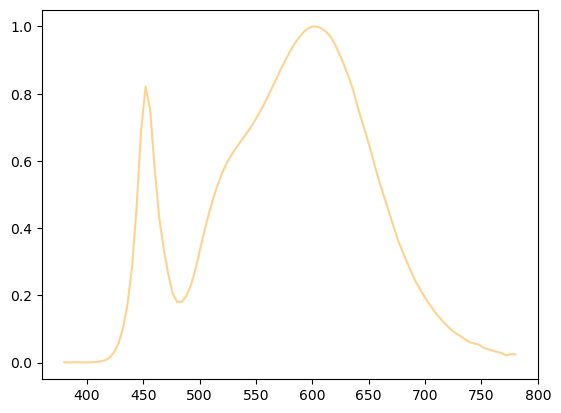

In [8]:
elevator_illuminant.plot()

## without cellular neugebauer

In [9]:
mets = {}
with open(f'../data/nix/11.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        mets[name]  = spectra

In [10]:
premium_primaries = {}
with open(f'../data/nix/apr11.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        premium_primaries[name]  = spectra

In [11]:
premium_primaries

{'0000': <chromalab.spectra.Spectra at 0x28dd68d90>,
 '0001': <chromalab.spectra.Spectra at 0x28de79490>,
 '0010': <chromalab.spectra.Spectra at 0x28dd68b10>,
 '0011': <chromalab.spectra.Spectra at 0x28dedda90>,
 '0100': <chromalab.spectra.Spectra at 0x28dd68a90>,
 '0101': <chromalab.spectra.Spectra at 0x28deddb90>,
 '0110': <chromalab.spectra.Spectra at 0x28dd68f90>,
 '0111': <chromalab.spectra.Spectra at 0x28deddc90>,
 '1000': <chromalab.spectra.Spectra at 0x14fcdac90>,
 '1001': <chromalab.spectra.Spectra at 0x28deddd10>,
 '1010': <chromalab.spectra.Spectra at 0x28de33490>,
 '1011': <chromalab.spectra.Spectra at 0x28dedd690>,
 '1100': <chromalab.spectra.Spectra at 0x28de32f50>,
 '1101': <chromalab.spectra.Spectra at 0x28dedd390>,
 '1110': <chromalab.spectra.Spectra at 0x28de43450>,
 '1111': <chromalab.spectra.Spectra at 0x28dedd7d0>}

In [12]:

premium_gamut = InkGamut(premium_primaries, illuminant=elevator_illuminant)

In [13]:
premium_gamut.get_width(tetrachromat_elevator, stepsize=0.05)

Generating point cloud: 2it [00:00,  5.98it/s]                                                 


Point cloud generated.
maximum distance is 0.018671834918664143 with percentages (0.10000000000000001, 0.10000000000000001, 0.35000000000000003, 0.60000000000000009) and (0.30000000000000004, 1.0, 0.050000000000000003, 0.0)


0.018671834918664143

(10, 10, 35, 60) and (30, 100, 5, 0)

In [14]:
tetrachromat_elevator.observe(premium_gamut.get_spectra((0.1, 0.1, 0.35, 0.6)))

array([ 0.20216982,  0.27673648,  0.31612858,  0.35578292])

In [15]:
tetrachromat_elevator.observe(premium_gamut.get_spectra((0.3, 1, 0.05, 0)))

array([ 0.20427506,  0.28917014,  0.33394688,  0.36398315])

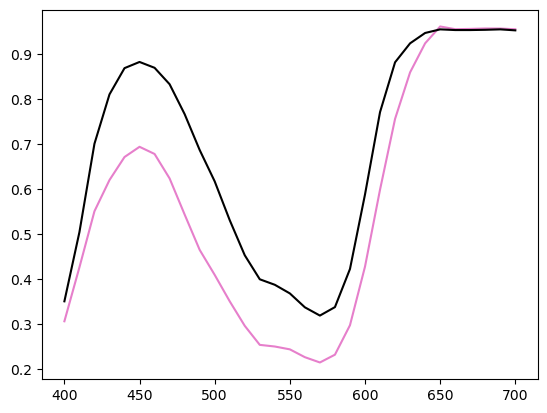

In [16]:
premium_gamut.get_spectra((0, 0, 0.5, 0)).plot()
mets["0,0,50,0"].plot(color='black')

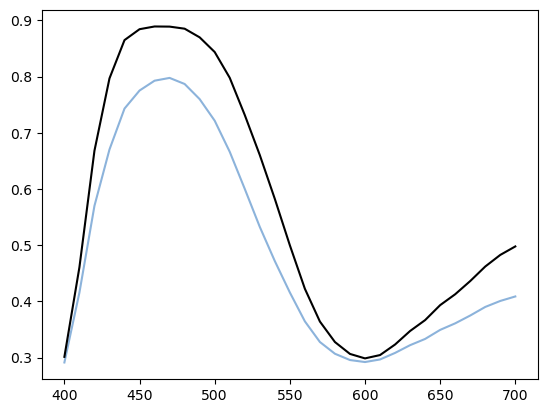

In [17]:
premium_gamut.get_spectra((0.50,0,0,0)).plot()
mets["50,0,0,0"].plot(color='black')

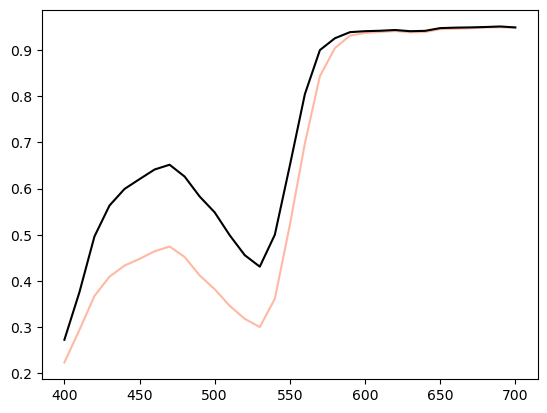

In [18]:
premium_gamut.get_spectra((0, 0.50, 0, 0)).plot()
mets["0,50,0,0"].plot(color='black')

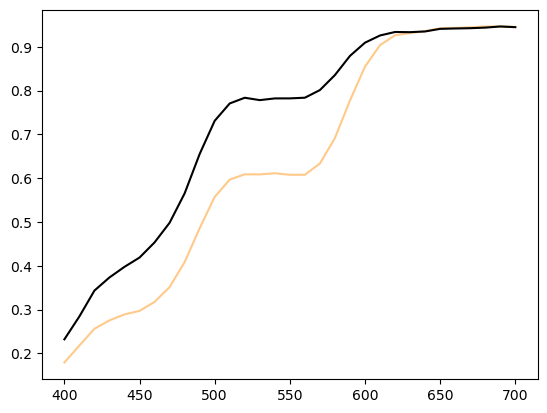

In [19]:
premium_gamut.get_spectra((0,0,0,0.50)).plot()
mets["0,0,0,50"].plot(color='black')

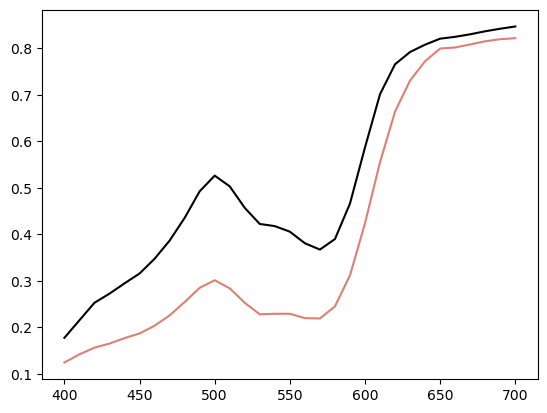

In [20]:
premium_gamut.get_spectra((0.1, 0.1, 0.35, 0.6)).plot()

mets["Outside"].plot(color='black')

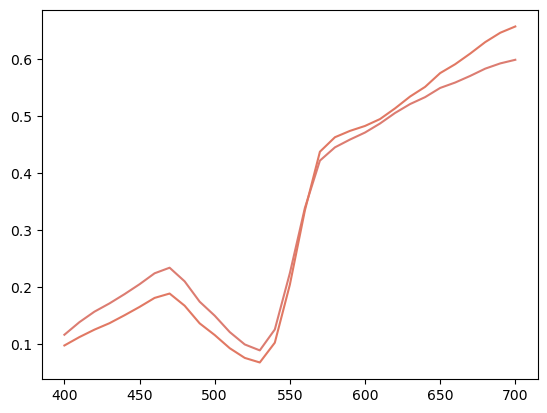

In [21]:
premium_gamut.get_spectra((0.3, 1, 0.05, 0)).plot()
mets["Inside"].plot()

## a cellular approach is needed

In [22]:
cell_primaries = {}
with open(f'../data/nix/11cell.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
    
        cell_primaries[name]  = spectra

In [23]:
cell_primaries

{'0000': <chromalab.spectra.Spectra at 0x1480c1590>,
 '0001': <chromalab.spectra.Spectra at 0x28dd47150>,
 '0002': <chromalab.spectra.Spectra at 0x28deb8b90>,
 '0010': <chromalab.spectra.Spectra at 0x29ca32610>,
 '0011': <chromalab.spectra.Spectra at 0x28dedc350>,
 '0012': <chromalab.spectra.Spectra at 0x29ca27c10>,
 '0020': <chromalab.spectra.Spectra at 0x28dedc390>,
 '0021': <chromalab.spectra.Spectra at 0x29ca6d710>,
 '0022': <chromalab.spectra.Spectra at 0x28dedc410>,
 '0100': <chromalab.spectra.Spectra at 0x29cb4bcd0>,
 '0101': <chromalab.spectra.Spectra at 0x28dedd190>,
 '0102': <chromalab.spectra.Spectra at 0x29cb0c910>,
 '0110': <chromalab.spectra.Spectra at 0x28dedd150>,
 '0111': <chromalab.spectra.Spectra at 0x29cb848d0>,
 '0112': <chromalab.spectra.Spectra at 0x28dedd2d0>,
 '0120': <chromalab.spectra.Spectra at 0x29cae6a50>,
 '0121': <chromalab.spectra.Spectra at 0x28dedd3d0>,
 '0122': <chromalab.spectra.Spectra at 0x29cba7110>,
 '0200': <chromalab.spectra.Spectra at 0x28ded

In [24]:
cell_neugebauer = CellNeugebauer(cell_primaries)

In [25]:
cell_neugebauer

In [26]:
cell_gamut = InkGamut(cell_neugebauer, illuminant=elevator_illuminant)

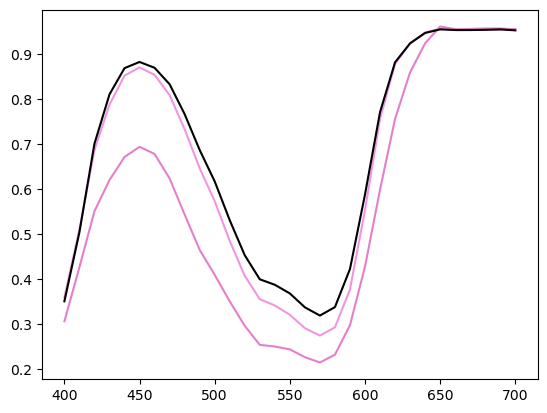

In [27]:
cell_gamut.get_spectra((0, 0, 0.5, 0)).plot()
premium_gamut.get_spectra((0, 0, 0.5, 0)).plot()
mets["0,0,50,0"].plot(color='black')

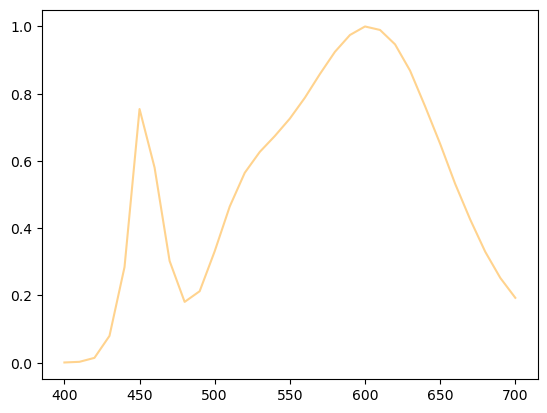

In [50]:
Spectra(data=cell_gamut.illuminant,wavelengths=wavelengths10).plot()

In [51]:
cell_gamut.get_buckets(tetrachromat_elevator, stepsize=0.05)[0]

Generating point cloud: 194481it [00:03, 51614.13it/s]                                         


Point cloud generated.


(0.020275786633149939,
 ((0.45000000000000001, 0.0, 0.45000000000000001, 0.5),
  (0.5, 0.55000000000000004, 0.10000000000000001, 0.20000000000000001)))

In [30]:
cell_gamut.get_width(tetrachromat_elevator, stepsize=0.05)

Generating point cloud: 194481it [00:03, 51763.18it/s]                                         


Point cloud generated.
maximum distance is 0.02027578663314994 with percentages (0.45000000000000001, 0.0, 0.45000000000000001, 0.5) and (0.5, 0.55000000000000004, 0.10000000000000001, 0.20000000000000001)


0.020275786633149939

In [33]:
cell_gamut.get_spectra((0.45, 0.0, 0.45, 0.5))

In [34]:
cell_gamut.get_spectra((0.5, 0.55, 0.1, 0.2))

In [35]:
def display_color_patch(rgb):
    # Create a 1x1 figure
    fig, ax = plt.subplots(figsize=(1, 1))
    
    # Create a 10x10 pixel array with the given RGB color
    color_array = np.full((10, 10, 3), rgb)
    
    # Display the color array as an image
    ax.imshow(color_array)
    
    # Remove the axes
    ax.axis('off')
    
    # Adjust the spacing and display the plot
    plt.tight_layout()
    plt.show()

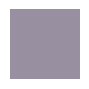

In [36]:
display_color_patch(cell_gamut.get_spectra((0.45, 0.0, 0.45, 0.5)).to_rgb())

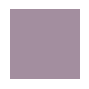

In [40]:
display_color_patch(cell_gamut.get_spectra((0.5, 0.55, 0.1, 0.2)).to_rgb())

In [41]:
tetrachromat = Observer.tetrachromat()

In [43]:
tetrachromat.observe(cell_gamut.get_spectra((0.45, 0.0, 0.45, 0.5)))

array([ 0.36869463,  0.30561456,  0.29441198,  0.29327632])

In [45]:
tetrachromat.observe(cell_gamut.get_spectra((0.5, 0.55, 0.1, 0.2)))

array([ 0.36608419,  0.30191599,  0.29976204,  0.30023048])

In [46]:
tetrachromat_elevator.observe(cell_gamut.get_spectra((0.45, 0.0, 0.45, 0.5)))

array([ 0.38601301,  0.27861892,  0.27304762,  0.27606538])

In [47]:
tetrachromat_elevator.observe(cell_gamut.get_spectra((0.5, 0.55, 0.1, 0.2)))

array([ 0.38832384,  0.29310539,  0.29294189,  0.29455906])

In [48]:
tetrachromat_elevator.observe(cell_gamut.get_spectra((0.5, 0.55, 0.1, 0.2))) - tetrachromat_elevator.observe(cell_gamut.get_spectra((0.45, 0.0, 0.45, 0.5)))

array([ 0.00231083,  0.01448647,  0.01989427,  0.01849367])

In [52]:
tetra_matrix = tetrachromat.get_sensor_matrix(cell_gamut.wavelengths)

In [54]:
cell_gamut.neugebauer.observe(np.array((0.5, 0.55, 0.1, 0.2)), tetra_matrix, cell_gamut.illuminant)

array([ 0.3887226 ,  0.2928097 ,  0.2926606 ,  0.29426312])

In [55]:
cell_gamut.neugebauer.observe(np.array((0.45, 0.0, 0.45, 0.5)), tetra_matrix, cell_gamut.illuminant)

array([ 0.38595595,  0.27799241,  0.27238481,  0.27550747])

In [58]:
np.array([ 0.38595595,  0.27799241,  0.27238481,  0.27550747]) - np.array([ 0.3887226 ,  0.2928097 ,  0.2926606 ,  0.29426312])



array([-0.00276665, -0.01481729, -0.02027579, -0.01875565])

In [68]:
import numpy as np

import numpy as np

def group_points_by_partition(points, axis, stepsize, offset=0):
    # Convert coordinates along the specified axis into partition indices
    partition_indices = np.floor((points[:, axis] - offset ) / stepsize).astype(int)
    return partition_indices
    
# Example usage
points = np.random.rand(100, 3)  # 100 random points in R^3
axis = 1  # Partition along the second axis (index 1)
step_size = 0.1
partitions = group_points_by_partition(points, axis, step_size)


In [67]:
points[:, axis]

array([ 0.10442603,  0.65372351,  0.67987645,  0.07833965,  0.46825229,
        0.11376945,  0.24041625,  0.9826427 ,  0.07552201,  0.91629143,
        0.3155859 ,  0.54917974,  0.78503507,  0.78865032,  0.09283756,
        0.66980682,  0.72753043,  0.13161361,  0.17160359,  0.13483843,
        0.97269807,  0.84440397,  0.04995543,  0.47903651,  0.19767551,
        0.4972375 ,  0.00242214,  0.18122856,  0.10598956,  0.45727166,
        0.7898274 ,  0.64361262,  0.51586149,  0.04990056,  0.35419979,
        0.67877371,  0.31711082,  0.1423574 ,  0.97979888,  0.65516366,
        0.64226513,  0.639379  ,  0.70068528,  0.02836291,  0.1341355 ,
        0.22054315,  0.05981203,  0.16189254,  0.15167699,  0.80421504,
        0.97620047,  0.22233067,  0.23749354,  0.59719817,  0.70827747,
        0.69950084,  0.42693343,  0.07980009,  0.86532863,  0.31931406,
        0.6760629 ,  0.54107356,  0.63246996,  0.38688516,  0.93987902,
        0.0232954 ,  0.43477725,  0.80512326,  0.9482106 ,  0.42

In [64]:
partitions

array([1, 6, 6, 0, 4, 1, 2, 9, 0, 9, 3, 5, 7, 7, 0, 6, 7, 1, 1, 1, 9, 8, 0,
       4, 1, 4, 0, 1, 1, 4, 7, 6, 5, 0, 3, 6, 3, 1, 9, 6, 6, 6, 7, 0, 1, 2,
       0, 1, 1, 8, 9, 2, 2, 5, 7, 6, 4, 0, 8, 3, 6, 5, 6, 3, 9, 0, 4, 8, 9,
       4, 6, 7, 2, 7, 1, 1, 4, 9, 4, 6, 6, 9, 7, 2, 3, 2, 3, 5, 8, 8, 9, 3,
       6, 7, 1, 0, 4, 4, 7, 9])

In [70]:
group_points_by_partition(points, axis, step_size, offset=0.05)


array([ 1,  3,  5,  8,  3, -1,  4,  1,  3,  6,  2,  9,  2,  6,  4,  6,  6,
        0,  2,  4,  4,  5,  2,  0,  3,  8,  6,  3,  3,  3,  1,  8,  2,  5,
        4,  7,  0,  3,  4,  0,  3,  9,  5,  1, -1,  4,  2,  1,  8,  6,  7,
        1,  3,  3,  9,  5,  6,  2,  1,  3,  7, -1,  1,  3,  4,  7, -1,  3,
        6,  7,  3,  8,  7,  8,  7,  2, -1,  5,  8,  3,  2,  8,  8,  1,  9,
        6,  1,  8,  5,  3,  3,  4,  7,  1,  4,  4,  5,  6,  4,  0])

In [113]:
def cosine(data1, data2):
    dot_product = np.dot(data1, data2)
    norm_data1 = np.linalg.norm(data1)
    norm_data2 = np.linalg.norm(data2)
    return (dot_product / (norm_data1 * norm_data2)) * 100

In [138]:
l_ss = Cone.l_cone(wavelengths=wavelengths10).data

In [139]:
m_ss = Cone.m_cone(wavelengths=wavelengths10).data

In [142]:
m_neitz = Cone.m_cone(wavelengths=wavelengths10,template="neitz").data

In [141]:
l_neitz559 = Cone.cone(559, wavelengths=wavelengths10,template="neitz").data

In [143]:
l_neitz557 = Cone.cone(557, wavelengths=wavelengths10,template="neitz").data

In [144]:
l_neitz555 = Cone.cone(555, wavelengths=wavelengths10,template="neitz").data

In [145]:
cosine(l_ss, m_ss)

91.640678024947448

In [146]:
cosine(m_ss, m_neitz)

99.989611724831619

In [147]:
cosine(l_ss, l_neitz555)

99.92387156348228

In [148]:
cosine(l_ss, l_neitz557)

99.964608253478318

In [149]:
cosine(l_ss, l_neitz559)

99.928100043918747

In [152]:
q_neitz = Cone.q_cone(template="neitz", wavelengths=wavelengths10).data

In [153]:
cosine(q_neitz, l_ss)

98.252780602835571

In [154]:
cosine(q_neitz, l_neitz557)

98.2489660188876

In [155]:
cosine(q_neitz, l_neitz559)

97.695388107284529

In [156]:
cosine(q_neitz, m_ss)

97.189011080754454

In [157]:
cosine(q_neitz, m_neitz)

97.110062962550231